# Feature Scaling:

## Normalization:

**DEF**
*Normzalization is a technique often applied as a part of data preparation for ML.The goal of normzalization is to change the value of numeric columns in the data set to use a common scale,without distoring difference in the ranges of value or losing information*

-------

**Techniques**

1. Min Max scaling
2. Mean normalization
3. Max absolute scaling
4. Robust scaling.

-------

**Min Max scaling**

Formula = Xi`=Xi-Xmin/Xmax-Xmin.

- When we do scaling the min and max values aur scaled between [0,1].
  
-------

**Mean normalization**

Formula = Xi`=Xi - Xmean / Xmax - Xmin

- Scaled range between [-1,1],-1 when value below to mean 1 when then value above the mean.

-------

**Max absolute**

Formula = Xi`=Xi / |Xmax|

- Usefull when data is spares data.

-------

**Robust scaling**

Formula = Xi`=Xi - Xmedian / IQR

- Use when data has Outliers.

-------

**Normalization VS Standardization**

1. Look at your data first is they need scaling like if you work with anti scaling algorithm like decision tree etc soo you don't need to scaling.
2. Standardization use more then normalization.
3. Normalization use as the pixel or image data mostly.

## Import Libaraies:

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Load dataset:

In [3]:
df=pd.read_csv('../Data/Salary_Data.csv',usecols=[0,4,5])
df

,Age,Years of Experience,Salary
0,32.0,5.0,90000.0
1,28.0,3.0,65000.0
2,45.0,15.0,150000.0
3,36.0,7.0,60000.0
4,52.0,20.0,200000.0
...,...,...,...
6699,49.0,20.0,200000.0
6700,32.0,3.0,50000.0
6701,30.0,4.0,55000.0
6702,46.0,14.0,140000.0


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Years of Experience  6701 non-null   float64
 2   Salary               6699 non-null   float64
dtypes: float64(3)
memory usage: 157.3 KB


,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

Age                    0
Years of Experience    0
Salary                 0
dtype: int64

**MIN MAX SCALING**

In [9]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('Years of Experience',axis=1),df['Years of Experience'],test_size=0.2,random_state=2)

In [10]:
X_train,X_test

(       Age    Salary
 2071  34.0  140000.0
 4401  30.0   25000.0
 219   40.0  100000.0
 778   31.0  195000.0
 1593  37.0  150000.0
 ...    ...       ...
 6447  41.0  120000.0
 3609  38.0   95000.0
 5708  27.0   80000.0
 6642  37.0   75000.0
 2577  50.0  177177.0
 
 [5359 rows x 2 columns],
        Age    Salary
 1303  54.0  190000.0
 1711  33.0  110000.0
 2599  38.0  136285.0
 5189  24.0   25000.0
 1785  33.0  115000.0
 ...    ...       ...
 4771  33.0  105000.0
 464   29.0  140000.0
 6152  30.0   95000.0
 6222  30.0   95000.0
 5742  32.0  120000.0
 
 [1340 rows x 2 columns])

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

scaler.fit(X_train)

Xtrain_scale=scaler.transform(X_train)
Xtest_scale=scaler.transform(X_test)

In [13]:
Xtrain_scale=pd.DataFrame(Xtrain_scale,columns=X_train.columns)
Xtest_scale=pd.DataFrame(Xtest_scale,columns=X_test.columns)

**Check the min max value scaled between 0,1**

In [19]:
print(np.round(Xtrain_scale.describe(),1))
print(np.round(Xtest_scale.describe(),1))

          Age  Salary
count  5359.0  5359.0
mean      0.3     0.5
std       0.2     0.2
min       0.0     0.0
25%       0.2     0.3
50%       0.3     0.5
75%       0.4     0.6
max       1.0     1.0
          Age  Salary
count  1340.0  1340.0
mean      0.3     0.5
std       0.2     0.2
min       0.0    -0.0
25%       0.2     0.3
50%       0.3     0.5
75%       0.4     0.7
max       1.0     1.0


Text(0.5, 1.0, 'After Scaling')

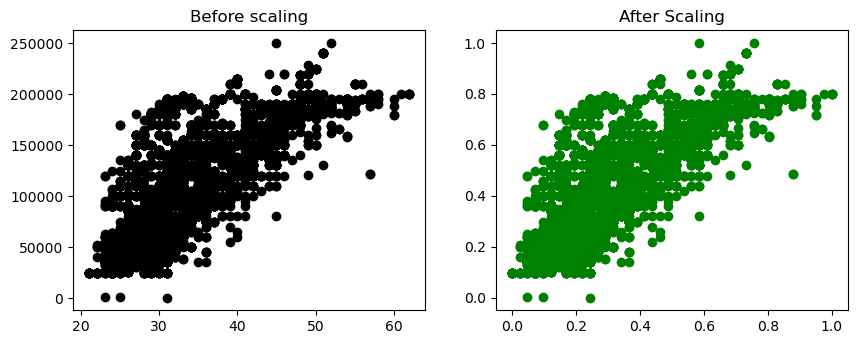

In [28]:
plt.figure(figsize=(10,8))
ax=plt.subplot(2,2,1)

#Before scaling
plt.scatter(X_train['Age'],X_train['Salary'],color='black')
plt.title('Before scaling')

#After scaling
ax=plt.subplot(2,2,2)
plt.scatter(Xtrain_scale['Age'],Xtrain_scale['Salary'],color='Green')
plt.title('After Scaling')

c:\Users\Admin\miniconda3\envs\main\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\miniconda3\envs\main\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Admin\miniconda3\envs\main\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Admin\miniconda3\envs\main\Lib\site-packages\seaborn\_oldcore.py:1

Text(0.5, 1.0, 'After scaling')

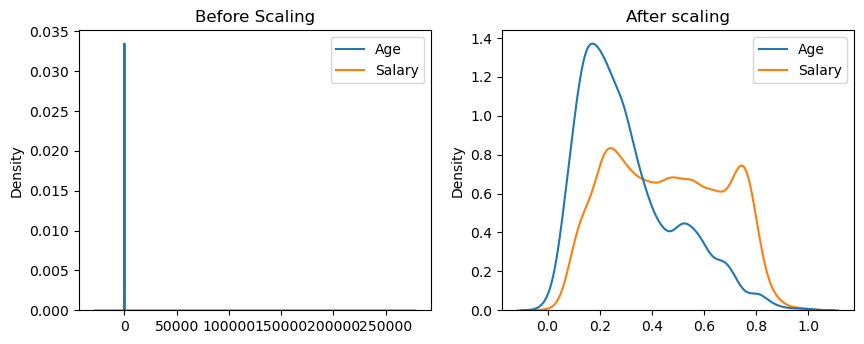

In [27]:
plt.figure(figsize=(10,8))
ax=plt.subplot(2,2,1)

#Before scaling
sns.kdeplot(X_train)
plt.title('Before Scaling')

#After scaling
ax=plt.subplot(2,2,2)
sns.kdeplot(Xtrain_scale)
plt.title('After scaling')